# Libraries importing

In [89]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Data loading and columns selection

In [90]:
selected_columns = ['age', 'stroke', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married', 'work_type',  'smoking_status',]

df = pd.read_csv('data/processed_data.csv')
df = df[selected_columns]
df.head()

,age,stroke,hypertension,heart_disease,avg_glucose_level,ever_married,work_type,smoking_status
0,6.0,1,0.000000,0.054022,0.594096,1,2,1
1,5.0,1,0.000000,0.000000,0.594096,1,3,2
2,7.0,1,0.000000,0.054022,0.583954,1,2,2
3,4.0,1,0.000000,0.000000,0.594096,1,2,3
4,7.0,1,0.097475,0.000000,0.594096,1,3,2


# Data splitting

In [91]:
x = df.drop('stroke', axis=1)
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Decision Tree Model

In [92]:
model = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=30)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.77      0.86       965
           1       0.12      0.51      0.19        57

    accuracy                           0.76      1022
   macro avg       0.54      0.64      0.52      1022
weighted avg       0.92      0.76      0.82      1022



# Decision Tree Visualization

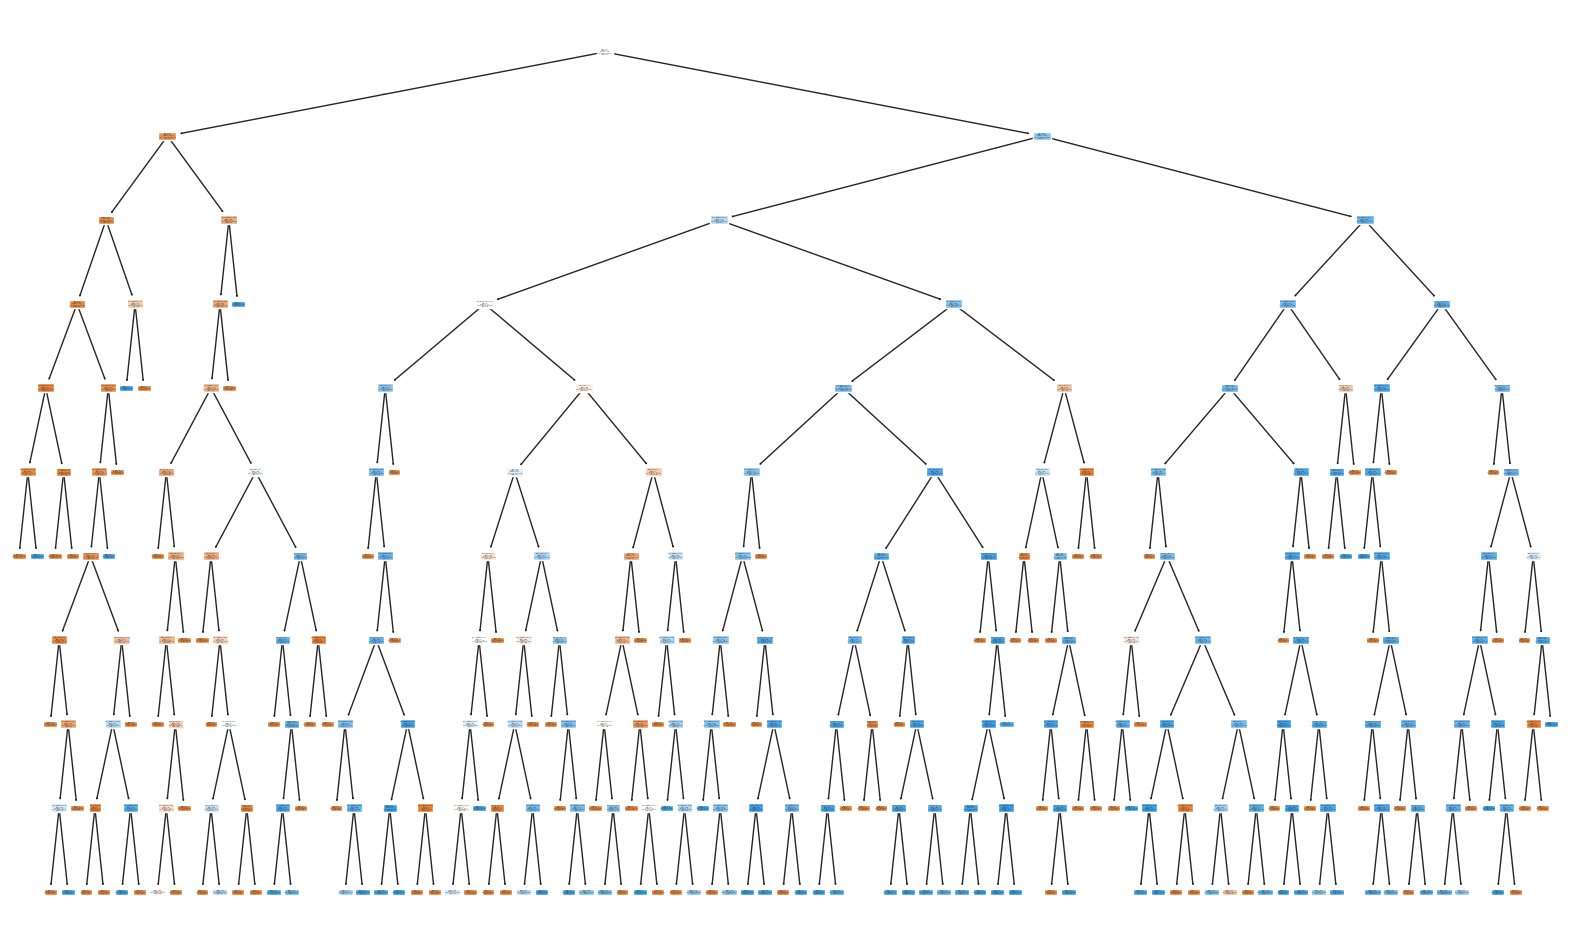

In [93]:
plt.figure(figsize=(20, 12))
plot_tree(model, filled=True, feature_names=selected_columns, class_names=True)
plt.savefig('tree.png')
plt.show()

# Random Forest Model

In [96]:
RF_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=30, min_samples_split= 5, min_samples_leaf=1 )
RF_model.fit(x_train, y_train)
RF_predictions = RF_model.predict(x_test)
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.15      0.04      0.06        57

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.51      1022
weighted avg       0.90      0.94      0.92      1022



# Hyperparameter Tuning for Random Forest

In [95]:
# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [ 300,400,500,1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RF_model,
    param_grid=param_grid,
    cv=4,                 # 4-fold cross-validation
    n_jobs=-1,            # use all CPU cores
    verbose=2,
    scoring='f1'
)

# Run grid search
grid_search.fit(x_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Accuracy:", test_score)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV Score: 0.05227762752053855
Test Set Accuracy: 0.9285714285714286
